In [1]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


In [15]:
import Distributions

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273


In [30]:
x = LinRange(-1.0, 1.0, 20)
y = LinRange(-1.0, 1.0, 20)

(20, 20)

In [13]:
t = LinRange(0.0, 1.0, Integer(1.0/0.01))

100-element LinRange{Float64}:
 0.0,0.010101,0.020202,0.030303,0.040404,…,0.969697,0.979798,0.989899,1.0

In [34]:
ω_mean = (2 * π) / 0.2
ω_dist = Distributions.Normal(ω_mean)
ω = rand(ω_dist, (length(x), length(y)))

20×20 Array{Float64,2}:
 32.5839  31.0698  31.6551  30.8643  …  31.8157  31.0854  33.0251  31.5761
 32.838   32.2983  31.6116  32.2994     31.4337  32.117   31.2473  31.0199
 31.1953  32.6696  31.8953  32.7541     30.6268  31.6417  31.7122  30.9545
 31.4504  31.5149  31.239   30.6728     31.4698  32.9121  31.7579  30.0092
 29.8339  32.2388  30.0042  31.9774     31.744   31.0435  32.7749  30.7222
 33.8227  31.5817  31.4247  29.3323  …  32.2113  32.0996  33.7068  32.2065
 32.7615  29.6331  30.5402  30.3338     31.4881  32.2857  33.3288  32.348 
 32.0222  31.6507  33.3681  29.9313     32.8071  31.7448  31.8574  30.2372
 33.4596  32.3016  32.1275  30.8852     32.4214  31.6295  31.642   30.6475
 31.402   29.6853  30.748   30.9277     31.9478  32.498   29.8699  32.8105
 31.2854  30.1271  30.6503  30.2573  …  29.9785  29.3345  31.7381  30.5289
 31.0412  30.3967  32.1645  31.7964     30.3859  31.4282  30.4685  31.3566
 32.3224  31.7194  30.4722  33.2601     29.3918  32.0088  32.0142  32.6608
 

In [35]:
ϕ_dist = Distributions.Normal(0, 0.1)
ϕ = rand(ϕ_dist, (length(x), length(y)))

20×20 Array{Float64,2}:
  0.0316035    0.0684951   0.0319062   …  -0.0641839     0.0320954 
 -0.0333909   -0.0673283  -0.110603        0.0193792     0.0825238 
 -0.0669569    0.0275103  -0.00111097     -0.133706      0.0833712 
  0.0443908   -0.0127563   0.0119393      -0.0059436    -0.0445377 
 -0.0366817   -0.129022    0.122103       -0.0146804    -0.061372  
 -0.0627611    0.0409687  -0.024426    …  -0.188591      0.0230753 
  0.129168    -0.0114551   0.159299        0.188428      0.16024   
  0.0462244    0.139262    0.0619303       0.112795     -0.00127038
 -0.146511    -0.0963663   0.151553        0.0021399    -0.071423  
 -0.0254712   -0.0780038   0.19341         0.166659     -0.0388237 
 -0.0177658   -0.0793898   0.0947854   …   0.000966555   0.0406895 
 -0.0361213   -0.0221656   0.143659        0.128617      0.00914057
  0.0402592   -0.0688384  -0.202213       -0.0930932    -0.04724   
 -0.0488668    0.0464876  -0.0502038       0.0384519    -0.12147   
  0.156018    -0.0514309

In [36]:
A = [exp(-(x^2 + y^2)) for x=x, y=y]

20×20 Array{Float64,2}:
 0.135335  0.165207  0.197253  0.230353  …  0.197253  0.165207  0.135335
 0.165207  0.201673  0.240792  0.281197     0.240792  0.201673  0.165207
 0.197253  0.240792  0.287499  0.335742     0.287499  0.240792  0.197253
 0.230353  0.281197  0.335742  0.392081     0.335742  0.281197  0.230353
 0.263111  0.321186  0.383487  0.447838     0.383487  0.321186  0.263111
 0.293941  0.358821  0.428422  0.500313  …  0.428422  0.358821  0.293941
 0.321186  0.392081  0.468133  0.546687     0.468133  0.392081  0.321186
 0.343265  0.419033  0.500313  0.584268     0.500313  0.419033  0.343265
 0.358821  0.438023  0.522987  0.610746     0.522987  0.438023  0.358821
 0.366862  0.447838  0.534706  0.624431     0.534706  0.447838  0.366862
 0.366862  0.447838  0.534706  0.624431  …  0.534706  0.447838  0.366862
 0.358821  0.438023  0.522987  0.610746     0.522987  0.438023  0.358821
 0.343265  0.419033  0.500313  0.584268     0.500313  0.419033  0.343265
 0.321186  0.392081  0.4681

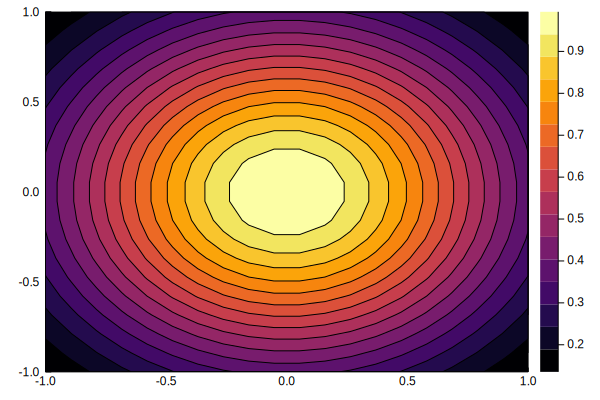

In [37]:
contour(x, y, A, fill=true)